In [186]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.family'] ='AppleGothic'
mpl.rcParams['axes.unicode_minus'] =False


In [187]:
df = pd.read_csv('./proj-yeardream_filtered3.csv')

In [188]:
df_payment = df[df['유형'] == 'PAYMENT']
df_payment.head()

,Unnamed: 0,거래ID,유형,고객ID,코스ID,사이트,포맷,카테고리,코스이름,거래일자,...,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액,연,월,일,시
0,0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022-12-31 22:12:33,...,189000,TRANSFER,159000,0,159000,0,2022,12,31,22
1,1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022-12-30 18:12:57,...,501000,TRANSFER,501000,0,501000,0,2022,12,30,18
2,2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022-12-31 23:12:15,...,549000,CARD,549000,0,549000,0,2022,12,31,23
3,3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022-12-31 23:12:03,...,165000,CARD,135000,30000,135000,0,2022,12,31,23
4,4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022-12-31 23:12:10,...,239000,CARD,239000,0,239000,0,2022,12,31,23


In [189]:
sales = df_payment.groupby(by='카테고리')['판매가격'].sum()

In [190]:
coupon_dc = df_payment.groupby(by='카테고리')['쿠폰할인액'].sum()

In [191]:
df_nested = pd.DataFrame({'판매가격': sales, '쿠폰할인액': coupon_dc, '현금지불': sales-coupon_dc,
            '쿠폰비중': coupon_dc/sales, '현금비중': 1-coupon_dc/sales})
df_nested

,판매가격,쿠폰할인액,현금지불,쿠폰비중,현금비중
카테고리,,,,,
데이터 사이언스,6361360060,1592232390,4769127670,0.250297,0.749703
디자인,1999351800,496571980,1502779820,0.248366,0.751634
마케팅,2342170000,528389756,1813780244,0.225598,0.774402
부동산/금융,2794815300,470743600,2324071700,0.168435,0.831565
부업/창업,196101000,87605900,108495100,0.446739,0.553261
업무 생산성,2139591700,510555145,1629036555,0.238623,0.761377
영상/3D,2816592000,644673700,2171918300,0.228884,0.771116
일러스트,2980035370,650357765,2329677605,0.218238,0.781762
투자/재테크,769069500,291621450,477448050,0.379187,0.620813


## 카테고리별 판매가격 -> 쿠폰할인액, 현금지불로 나눔
- 월별 실거래금액 합
- 유형:PAYMENT로 소팅했기 때문에 환불금액은 제외되어 있음

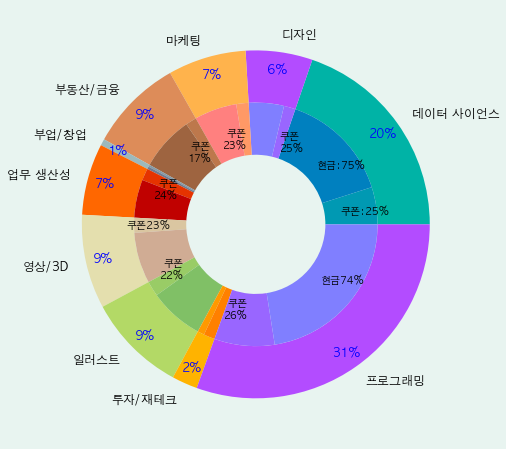

In [192]:

import matplotlib.pyplot as plt

a,b,c,d,e,f,g,h,i,j = [plt.cm.winter, plt.cm.cool, plt.cm.spring, plt.cm.copper, plt.cm.bone, plt.cm.gist_heat, plt.cm.pink,
                     plt.cm.summer, plt.cm.autumn, plt.cm.cool]
outer_colors = [a(.7), b(.7), c(.7), d(.7), e(.7), f(.7), g(.7), h(.7), i(.7), j(.7)]
inner_colors = [a(.6), a(.5), 
                b(.6), b(.5),
                c(.6), c(.5),
                d(.6), d(.5),
                e(.6), e(.5),
                f(.6), f(.5),
                g(.6), g(.5),
                h(.6), h(.5),
                i(.6), i(.5),
                j(.6), j(.5),
                ]
    
fig, ax = plt.subplots(figsize=(8,8), facecolor='#e8f4f0')
font_color = '#525252'

wedges, texts, autotexts = ax.pie(df_nested['판매가격'], 
                                   labels=df_nested.index,
                                   colors=outer_colors, 
                                   autopct='%1.0f%%', 
                                   pctdistance=0.9, 
                                   wedgeprops=dict(width=0.3))

# autotexts는 autopct에 의해 생성된 텍스트의 목록입니다.
plt.setp(autotexts, size=12, weight="bold", color="blue")

# texts는 labels에 의해 생성된 텍스트의 목록입니다.
plt.setp(texts, size=12, weight="bold")

# inner circle 설정
inner_values = df_nested[['쿠폰할인액', '현금지불']].values.flatten()
inner_labels = [f'쿠폰:{in_val[0]}',f'현금:{in_val[1]}',f'쿠폰\n{in_val[2]}','',f'쿠폰\n{in_val[4]}',
                '',f'쿠폰\n{in_val[6]}','','','',f'쿠폰\n{in_val[10]}','',f'쿠폰{in_val[12]}','',f'쿠폰\n{in_val[14]}',
                '','','',f'쿠폰\n{in_val[18]}',f'현금{in_val[19]}']
in_val = []

for i, value in enumerate(inner_values):
    if i % 2 == 0:
        percent = value / (value + inner_values[i+1]) * 100
        in_val.append(percent)
    elif i % 2 == 1:
        percent = value / (value + inner_values[i-1]) * 100
        in_val.append(percent)

in_val = [f'{val:.0f}%' for val in in_val]


wedges2, texts2 = ax.pie(inner_values,
                        labels = inner_labels,
                        labeldistance = 0.7,
                        pctdistance=0.6,
                        radius=1-0.3, 
                        colors=inner_colors,
                        wedgeprops=dict(width=0.3))
plt.setp(texts2, size=10)

plt.show()

In [193]:
df_payment_coupon = df_payment[df_payment['쿠폰할인액'] > 0]

coupon_count = df_payment_coupon['카테고리'].value_counts()
pay_count = df_payment['카테고리'].value_counts()
pay_count
type(coupon_count)

pandas.core.series.Series

In [194]:
df_category = pd.DataFrame({'쿠폰사용구매건': coupon_count, '일반구매건': pay_count,
                            '합계': coupon_count+pay_count, '쿠폰비중': coupon_count/pay_count,
                            '일반비중': 1-(coupon_count/pay_count)})
df_category

,쿠폰사용구매건,일반구매건,합계,쿠폰비중,일반비중
데이터 사이언스,12433,24867,37300,0.499980,0.500020
디자인,4928,9396,14324,0.524479,0.475521
마케팅,5907,12023,17930,0.491308,0.508692
부동산/금융,4441,10143,14584,0.437839,0.562161
부업/창업,674,1018,1692,0.662083,0.337917
업무 생산성,6393,13052,19445,0.489810,0.510190
영상/3D,6360,12981,19341,0.489947,0.510053
일러스트,8318,14258,22576,0.583392,0.416608
투자/재테크,1509,2348,3857,0.642675,0.357325
프로그래밍,25394,47923,73317,0.529892,0.470108


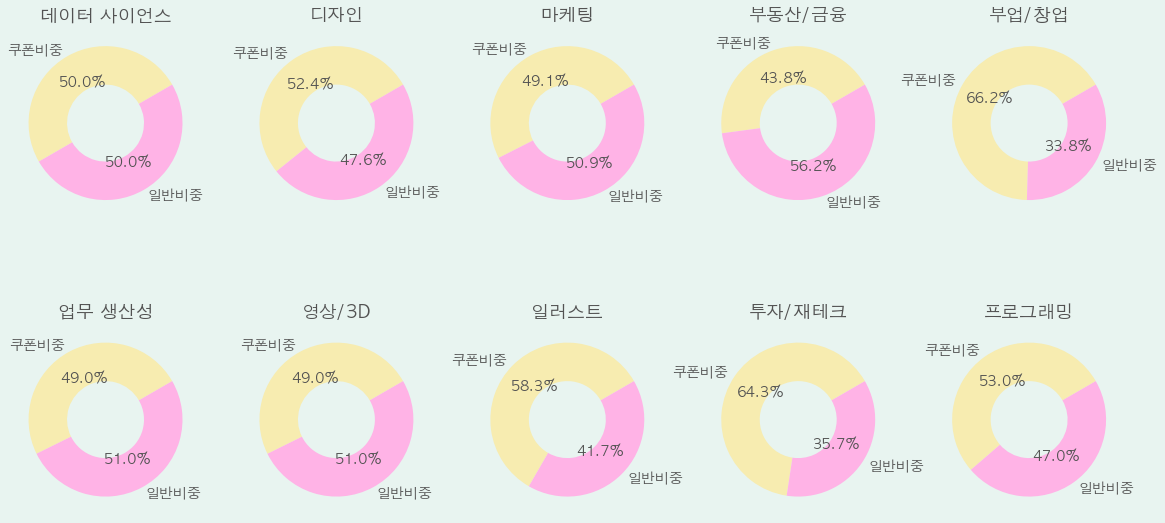

In [195]:
font_color = '#525252'
colors = ['#f7ecb0', '#ffb3e6', '#99ff99', '#66b3ff', '#c7b3fb','#ff6666', '#f9c3b7']
count = 0

fig, axs = plt.subplots(2, 5, figsize=(20, 10), facecolor='#e8f4f0')

for i in range(0,2):
    for j in range(0,5):
        axs[i,j].pie(df_category[['쿠폰비중', '일반비중']].iloc[count],
                    labels=df_category.columns[3:5], autopct='%2.1f%%',
                    colors=colors, startangle=30, wedgeprops=dict(width=.5),
                    textprops={'fontsize': 14, 'color':font_color})
        axs[i,j].set_title(df_category.index[count], fontsize=18, color=font_color)
        # mpl.rcParams['font.size'] = 16
        count += 1


In [196]:
df_category_sum = pd.DataFrame({'쿠폰사용구매건': coupon_count.sum(), '일반구매건': pay_count.sum(),
                            '합계': coupon_count.sum()+pay_count.sum(), '쿠폰비중': coupon_count.sum()/pay_count.sum(),
                            '일반비중': 1-(coupon_count.sum()/pay_count.sum())}, index=['합계'])
df_category_sum

,쿠폰사용구매건,일반구매건,합계,쿠폰비중,일반비중
합계,76357,148009,224366,0.515894,0.484106


Text(0.5, 1.0, '쿠폰 사용 구매건 비중(전체)')

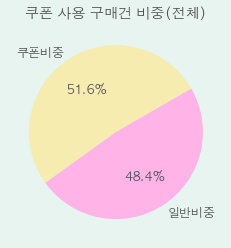

In [197]:
font_color = '#525252'
colors = ['#f7ecb0', '#ffb3e6', '#99ff99', '#66b3ff', '#c7b3fb','#ff6666', '#f9c3b7']

# Create subplots and a pie chart
fig, ax = plt.subplots(figsize=(4, 4), facecolor='#e8f4f0')
ax.pie(df_category_sum[['쿠폰비중', '일반비중']].iloc[0], 
       labels=df_category_sum.columns[3:5], autopct='%2.1f%%', colors=colors, startangle=30,
       textprops={'fontsize': 12, 'color':font_color})
# Set title, its position, and font size
plt.title("쿠폰 사용 구매건 비중(전체)", fontsize=14, color=font_color)


## 카테고리별 Treemap
- 월별 실거래금액 합
- 유형:PAYMENT로 소팅했기 때문에 환불금액은 제외되어 있음

In [198]:
import plotly.express as px
fig2 = px.treemap(df_payment, path=['카테고리', '코스이름'], values='실거래금액')
fig2.update_layout(title_text='카테고리별 Tree Map')
fig2.update_traces(textfont_size=18)  # 원하는 텍스트 크기로 변경
fig2.show()

In [199]:
program_series = df_payment[df_payment['카테고리'] == '프로그래밍'].groupby('코스이름')['실거래금액'].sum().sort_values(ascending=False)
program_series = program_series[program_series != 0]
labels = list(program_series.index[:10]) + [''] * (len(program_series) - 10)
labels

['초격차 패키지 : 한 번에 끝내는 프론트엔드 개발',
 '올인원 패키지 : 스프링의 정석 : 남궁성과 끝까지 간다',
 '초격차 패키지: Kubernetes와 Docker로 한 번에 끝내는 컨테이너 기반 MSA',
 '초격차 패키지 : 한 번에 끝내는 Java/Spring 웹 개발 마스터',
 '초격차 패키지 : 10개 프로젝트로 완성하는 백엔드 웹개발(Java/Spring)',
 '초격차 패키지 : 한 번에 끝내는 블록체인 개발 A to Z',
 '초격차 패키지 : 한 번에 끝내는 컴퓨터 공학 전공필수 & 인공지능 심화',
 '초격차 패키지 : 한 번에 끝내는 AWS 인프라 구축과 DevOps 운영',
 ' 초격차 패키지 : 한 번에 끝내는 서비스 기획의 모든 것',
 '초격차 패키지 : 백엔드 개발자를 위한 한 번에 끝내는 대용량 데이터 & 트래픽 처리',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

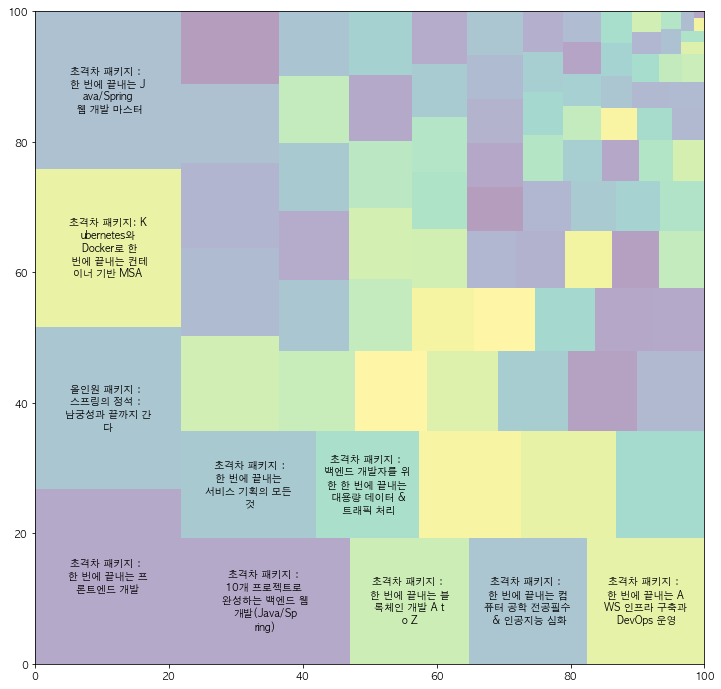

In [200]:
import squarify

labels = ['\n'.join(label[i:i+10] for i in range(0, len(label), 10)) for label in labels]

fig3, ax3 = plt.subplots(figsize = (12,12))
squarify.plot(sizes=program_series.values,
              label=labels,
              ax=ax3,
              alpha=.4)

plt.show()


## 카테고리별 lineplot
- 월별 실거래금액 합
- 유형:PAYMENT로 소팅했기 때문에 환불금액은 제외되어 있음

In [209]:
df_lineplot = df_payment.groupby(by=['카테고리', '월'])['실거래금액'].sum().reset_index()
df_lineplot

,카테고리,월,실거래금액
0,데이터 사이언스,1,476626550
1,데이터 사이언스,2,346211450
2,데이터 사이언스,3,362084250
3,데이터 사이언스,4,343958750
4,데이터 사이언스,5,293656400
...,...,...,...
115,프로그래밍,8,665215184
116,프로그래밍,9,688665368
117,프로그래밍,10,611460158
118,프로그래밍,11,605271446


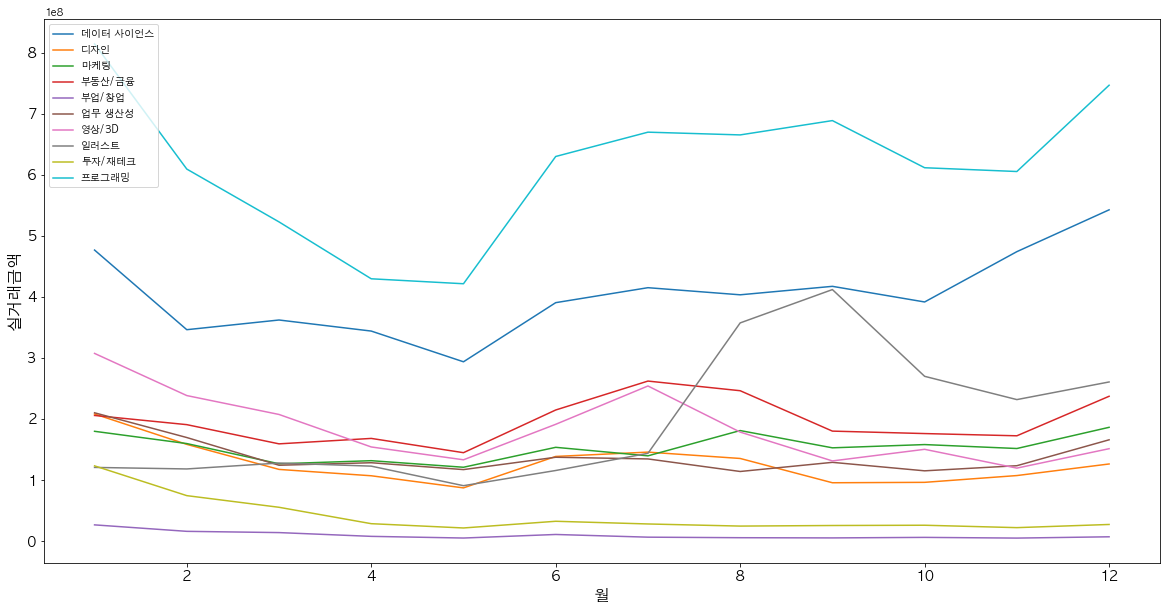

In [210]:
fig4, ax4 = plt.subplots(figsize=(20, 10))
sns.lineplot(x="월", y="실거래금액", hue="카테고리", data=df_lineplot, ax=ax4)

ax4.set_xlabel("월", fontsize=16)  # Adjust x-axis label size
ax4.set_ylabel("실거래금액", fontsize=16)  # Adjust y-axis label size
ax4.tick_params(axis='y', labelsize=14)  # Adjust y-axis tick label size
ax4.tick_params(axis='x', labelsize=14)  # Adjust x-axis tick label size

plt.legend(fontsize='medium', loc='upper left')
plt.show()

In [222]:
df_payment[df_payment['실거래금액'] == 0]
df_payment2 = df_payment.drop(df_payment[df_payment['실거래금액']==0].index, axis=0)
df_payment2[df_payment2['실거래금액'] == 0]

,Unnamed: 0,거래ID,유형,고객ID,코스ID,사이트,포맷,카테고리,코스이름,거래일자,...,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액,연,월,일,시


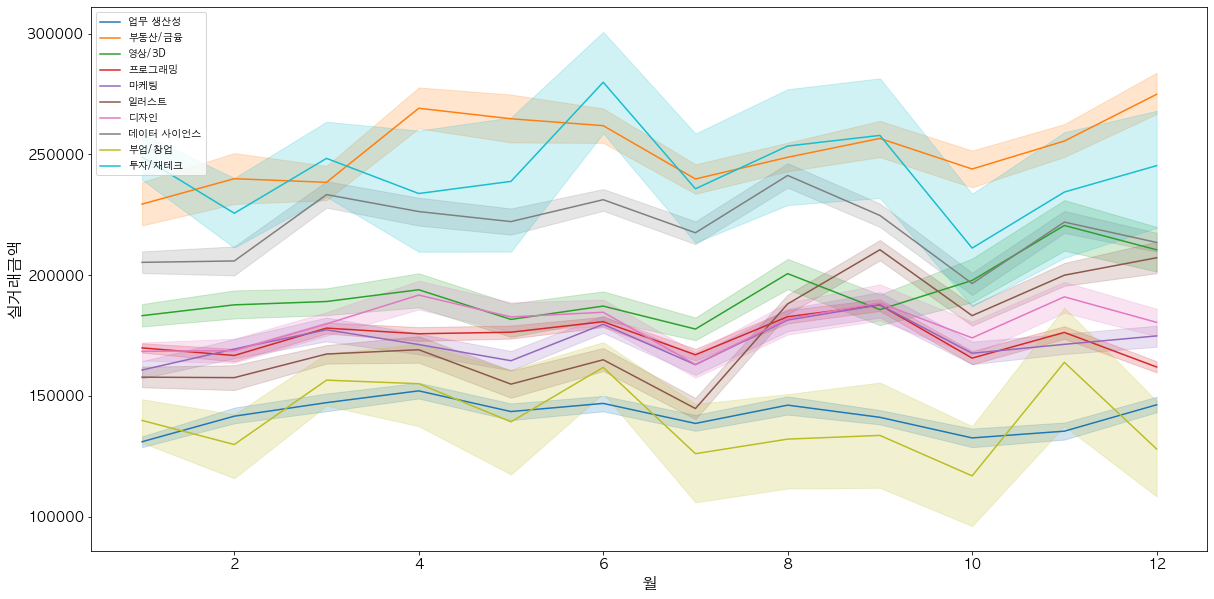

In [223]:
fig4, ax4 = plt.subplots(figsize=(20, 10))
sns.lineplot(x="월", y="실거래금액", hue="카테고리", data=df_payment2, ax=ax4)

ax4.set_xlabel("월", fontsize=16)  # Adjust x-axis label size
ax4.set_ylabel("실거래금액", fontsize=16)  # Adjust y-axis label size
ax4.tick_params(axis='y', labelsize=14)  # Adjust y-axis tick label size
ax4.tick_params(axis='x', labelsize=14)  # Adjust x-axis tick label size

plt.legend(fontsize='medium', loc='upper left')
plt.show()

## 카테고리별 heatmap
- Value가 숫자인 항목만 포함

In [203]:
df_corr = df[['거래ID', '고객ID', '코스ID', '판매가격', '쿠폰할인액', '실거래금액', '환불금액', '월', '일']]
df_corr

,거래ID,고객ID,코스ID,판매가격,쿠폰할인액,실거래금액,환불금액,월,일
0,2417084,20053,209016,189000,0,159000,0,12,31
1,2415408,58309,210664,501000,0,501000,0,12,30
2,2413897,18075,211782,549000,0,549000,0,12,31
3,2413891,41898,213450,165000,30000,135000,0,12,31
4,2413887,94328,210773,239000,0,239000,0,12,31
...,...,...,...,...,...,...,...,...,...
159322,1551424,39658,204491,217000,10000,207000,0,1,1
159323,1551410,95136,206811,385000,0,385000,0,1,1
159324,1551361,12764,202927,166000,30000,136000,0,1,1
159325,1545070,19606,208104,289000,0,289000,0,1,2


In [204]:
df_corr = df_corr.corr().round(2)
df_corr

,거래ID,고객ID,코스ID,판매가격,쿠폰할인액,실거래금액,환불금액,월,일
거래ID,1.00,0.00,0.46,0.01,-0.04,0.03,-0.00,1.00,0.18
고객ID,0.00,1.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.01
코스ID,0.46,-0.00,1.00,0.01,-0.04,0.02,-0.01,0.45,0.09
판매가격,0.01,0.00,0.01,1.00,0.10,0.40,-0.12,0.01,0.01
쿠폰할인액,-0.04,0.00,-0.04,0.10,1.00,-0.36,0.15,-0.02,-0.23
실거래금액,0.03,-0.00,0.02,0.40,-0.36,1.00,0.68,0.02,0.15
환불금액,-0.00,-0.00,-0.01,-0.12,0.15,0.68,1.00,-0.01,0.02
월,1.00,0.00,0.45,0.01,-0.02,0.02,-0.01,1.00,0.10
일,0.18,-0.01,0.09,0.01,-0.23,0.15,0.02,0.10,1.00


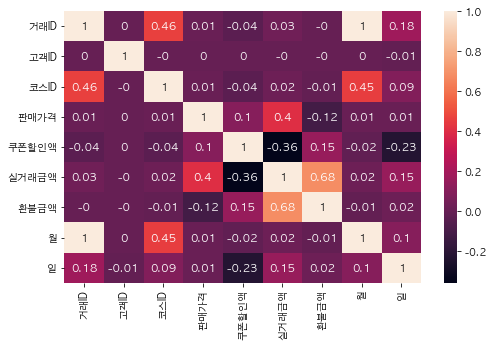

In [205]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(df_corr, annot=True, annot_kws={"fontsize": 11}, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)  # Adjust x-axis tick label size
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)  # Adjust y-axis tick label size
plt.show()

In [207]:
##